## Passo 0 - O que desejamos obter com as analises
Quais das variaves numericas influenciam mais no consumo médio das pessoas no ano

Queremos saber qual o melhor meio de negócio

## Passo1 - Bibliotecas

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


### 1.1 - Lendo o arquivo

In [725]:
train = pd.read_csv('titanic_train.csv')

In [726]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Passo 2 - Análise de dados exploratória

In [727]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [728]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [729]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Passo 2.1 Visualisação gráfica prévia 

<AxesSubplot:>

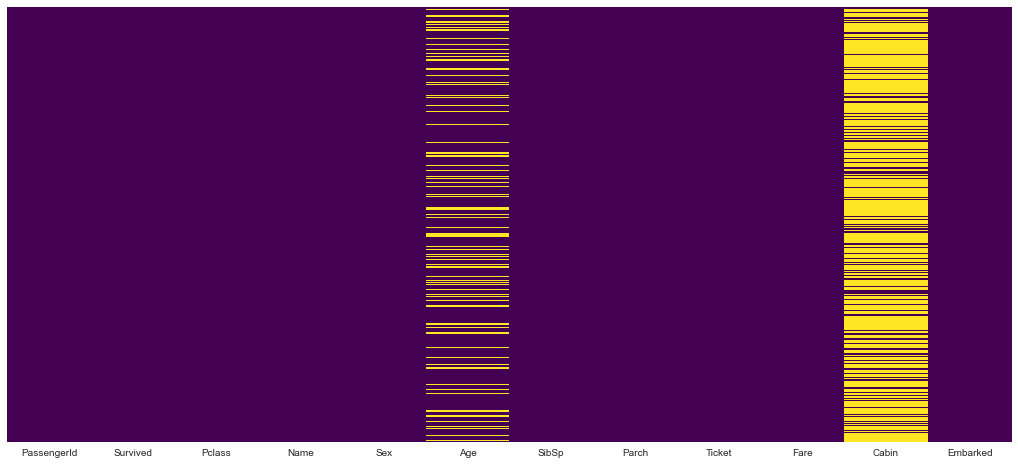

In [730]:
plt.figure(figsize=(18,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### -> Na coluna Cabin existe muitos dados faltantes por isso iremos descartar.
##### -> A coluna Age, possui alguns dados faltantes mas é possivel tratar

In [731]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

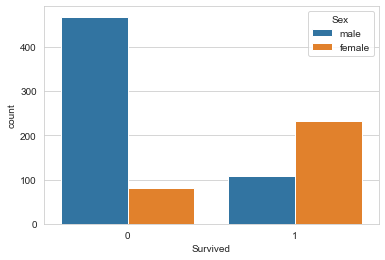

In [732]:
sns.countplot(x='Survived', data=train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

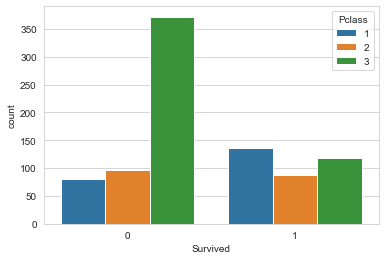

In [733]:
sns.countplot(x='Survived', data=train, hue='Pclass')

In [734]:
train['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

<AxesSubplot:>

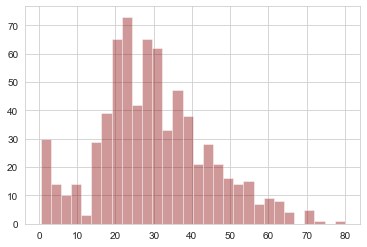

In [735]:
train['Age'].hist(bins=30, color='darkred', alpha=0.4)
# Podemos observar que a maioria dos passajeiros tem entorno de 20 a 30 anos

<AxesSubplot:xlabel='SibSp', ylabel='count'>

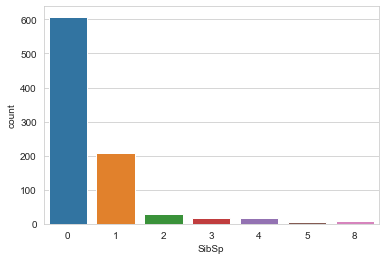

In [736]:
sns.countplot(x='SibSp', data=train)
# a coluna 'SibSp' refere-se a quantidade de acompanhates.
# Podemos notar que a maioria dos passajeiros estavam viajando só ou com um acompanhante.

<AxesSubplot:>

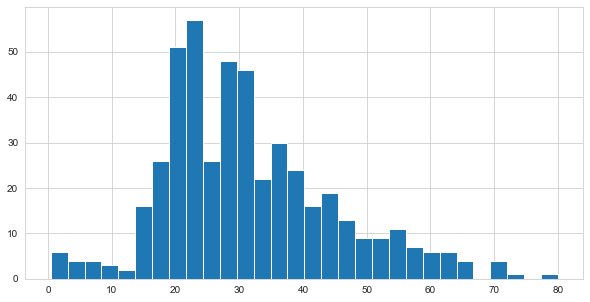

In [737]:
plt.figure(figsize=(10,5))
train[train['SibSp'] == 0]['Age'].hist(bins=30)

<AxesSubplot:>

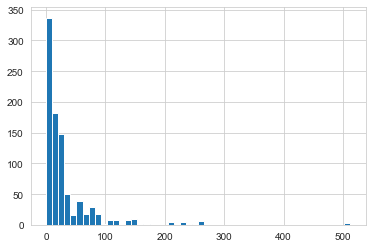

In [738]:
train['Fare'].hist(bins=50)
# A grande maioria das pessoas pagaram menos de 100dol 

<AxesSubplot:>

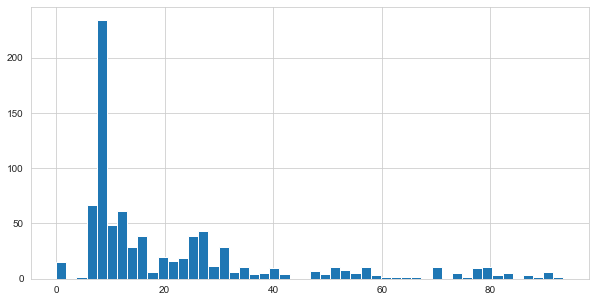

In [739]:
train[train['Fare']<100]['Fare'].hist(bins=50, figsize=(10,5))

### Passo 2.2. Tratamento de dados faltantes

In [740]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

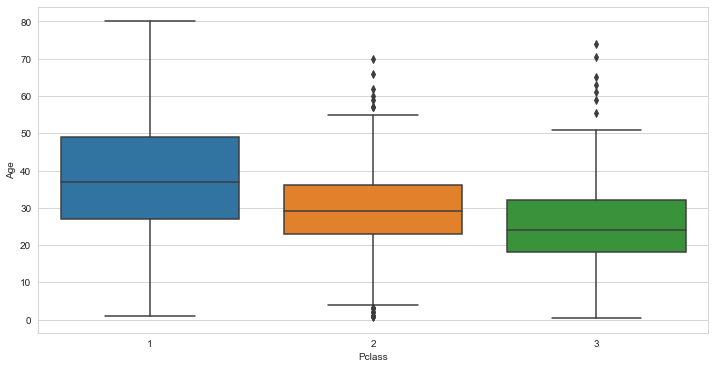

In [741]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [742]:
df = train[['Age','Pclass']]
df.head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [743]:
df.loc[(df['Age'].isnull() ==True )&(df['Pclass'] == 1),'Age'] = 37
df.loc[(df['Age'].isnull() ==True )&(df['Pclass'] == 2),'Age'] = 29
df.loc[(df['Age'].isnull() ==True )&(df['Pclass'] == 3),'Age'] = 24

c:\users\diogo f\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [744]:
df_dados_faltantes = df.isnull().sum()
df_dados_faltantes

Age       0
Pclass    0
dtype: int64

#### Utilizando outrs funções

#### Usanso np.where

In [745]:
df1 = train[['Age','Pclass']]

In [746]:
df1['Age'] = np.where((df1['Age'].isnull() == True)&(df1['Pclass'] == 1), 37, df1['Age'])

c:\users\diogo f\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


#### usando mask

In [747]:
df2 = train[['Age','Pclass']]

In [748]:
df2['Age'].mask((df2['Age'].isnull() == True)&(df2['Pclass'] == 1), 37, axis=0, inplace=True)

c:\users\diogo f\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [749]:
df2[df2['Pclass']==1].head()

,Age,Pclass
1,38.0,1
3,35.0,1
6,54.0,1
11,58.0,1
23,28.0,1


### Usando .apply

In [750]:
df3 = train[['Age','Pclass']]

In [751]:
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [752]:
df3['Age'] = df3.apply(inputar_idade, axis=1)

c:\users\diogo f\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [753]:
df3[df3['Pclass']==1].head()

,Age,Pclass
1,38.0,1
3,35.0,1
6,54.0,1
11,58.0,1
23,28.0,1


<AxesSubplot:>

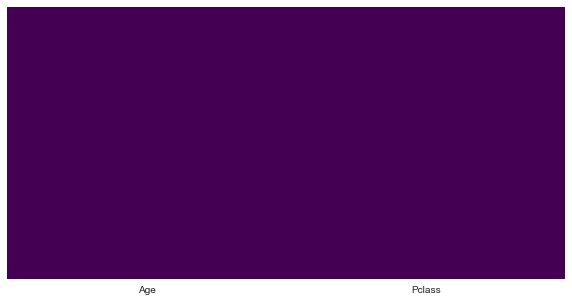

In [754]:
plt.figure(figsize=(10,5))
sns.heatmap(df3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Passo 2.3. Limpando dados menos relevantes para o modelo

In [755]:
# Dando continuidade no tratamento dos dados faltantes

In [756]:
del train['Cabin']
# train.drop('Cabin', inplace=True)

In [757]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [758]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [759]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [760]:
train.drop(['Sex','Age','PassengerId','Name','Ticket'],axis=1, inplace=True)

In [761]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked
0,0,3,1,0,7.2500,S
1,1,1,1,0,71.2833,C
2,1,3,0,0,7.9250,S
3,1,1,1,0,53.1000,S
4,0,3,0,0,8.0500,S


In [762]:
Age = df3.drop(['Pclass'], axis=1)

In [763]:
train.drop(["Embarked"],axis=1, inplace=True)

In [764]:
#Inserindo as informações dummies

In [765]:
train2 = pd.concat([Age, train,sex,embark], axis=1)

In [766]:
train2

,Age,Survived,Pclass,SibSp,Parch,Fare,male,Q,S
0,22.0,0,3,1,0,7.2500,1,0,1
1,38.0,1,1,1,0,71.2833,0,0,0
2,26.0,1,3,0,0,7.9250,0,0,1
3,35.0,1,1,1,0,53.1000,0,0,1
4,35.0,0,3,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.0,0,2,0,0,13.0000,1,0,1
887,19.0,1,1,0,0,30.0000,0,0,1
888,24.0,0,3,1,2,23.4500,0,0,1
889,26.0,1,1,0,0,30.0000,1,0,0


In [767]:
train2
# todos os dados do train agora são numericos

,Age,Survived,Pclass,SibSp,Parch,Fare,male,Q,S
0,22.0,0,3,1,0,7.2500,1,0,1
1,38.0,1,1,1,0,71.2833,0,0,0
2,26.0,1,3,0,0,7.9250,0,0,1
3,35.0,1,1,1,0,53.1000,0,0,1
4,35.0,0,3,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.0,0,2,0,0,13.0000,1,0,1
887,19.0,1,1,0,0,30.0000,0,0,1
888,24.0,0,3,1,2,23.4500,0,0,1
889,26.0,1,1,0,0,30.0000,1,0,0


<AxesSubplot:>

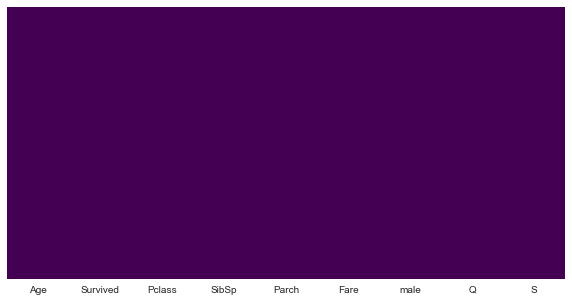

In [774]:
plt.figure(figsize=(10,5))
sns.heatmap(train2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Passo 3 - Criando o modelo

#### Passo 3.1. Separando os dados de treino e test

In [779]:
train3 = train2.drop(['Survived'],axis=1)

In [798]:
train3.head()

,Age,Pclass,SibSp,Parch,Fare,male,Q,S
0,22.0,3,1,0,7.2500,1,0,1
1,38.0,1,1,0,71.2833,0,0,0
2,26.0,3,0,0,7.9250,0,0,1
3,35.0,1,1,0,53.1000,0,0,1
4,35.0,3,0,0,8.0500,1,0,1


In [776]:
sobrevivente = train2.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'],axis=1)

In [799]:
sobrevivente.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#### Passo 3.2. Definindo as variaveis de treino e teste

In [800]:
X_train, X_test, y_train, y_test = train_test_split(train3, sobrevivente, test_size=0.3)

#### Passo 3.1. Criando a instancia para o modelo

In [801]:
logmodel = LogisticRegression()

## Passo 4 - Treinando o modelo

In [802]:
logmodel.fit(X_train, y_train)

c:\users\diogo f\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\diogo f\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Passo 5 - Testando os dados 

#### Passo 5.1. realizando predições

In [803]:
prections = logmodel.predict(X_test)

#### Passo 5.2. metricas

In [804]:
print(classification_report(y_test, prections))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       176
           1       0.70      0.75      0.72        92

    accuracy                           0.80       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.81      0.80      0.80       268



In [805]:
print(confusion_matrix(y_test, prections))

[[146  30]
 [ 23  69]]


# Passo 6 - Conclusão

A pesar da exclusão de alguns dados em formato de string o modelo apresentou 81% de acerto. Esse resultado pode ser satisfatório dependendo a aplicação do modelo.